In [1]:
import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv())
src_path = os.environ.get('PROJECT_SRC')
os.chdir(src_path)

In [2]:
import pypsa
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

from energy_centre import EnergyCentre

## Scenario 1 - Direct electric

In [3]:
timestep = '0.5H'
timestamp_from = '2019-01-01 00:00:00'
timestamp_to = '2019-12-31 23:30:00'
DE = EnergyCentre(timestep=timestep, timestamp_from=timestamp_from, timestamp_to=timestamp_to)
DE.get_data_scottish_borders()
DE.add_bus('heat')
DE.add_bus('elec')
DE.add_heat_demand()
DE.add_elec_demand()
DE.add_grid_connection()
DE.add_resistive_heater()

# run LOPF
DE.network.lopf(DE.network.snapshots,
                    solver_name="gurobi",
                #   pyomo=False,
                #   keep_shadowprices=True,
                    )

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `kirchhoff` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x35041_copy
  Lower bound: 695255.5010765404
  Upper bound: 695255.5010765404
  Number of objectives: 1
  Number of constraints: 70081
  Number of variables: 35041
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 35041
  Number of nonzeros: 87601
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination me

(<SolverStatus.ok: 'ok'>, <TerminationCondition.optimal: 'optimal'>)

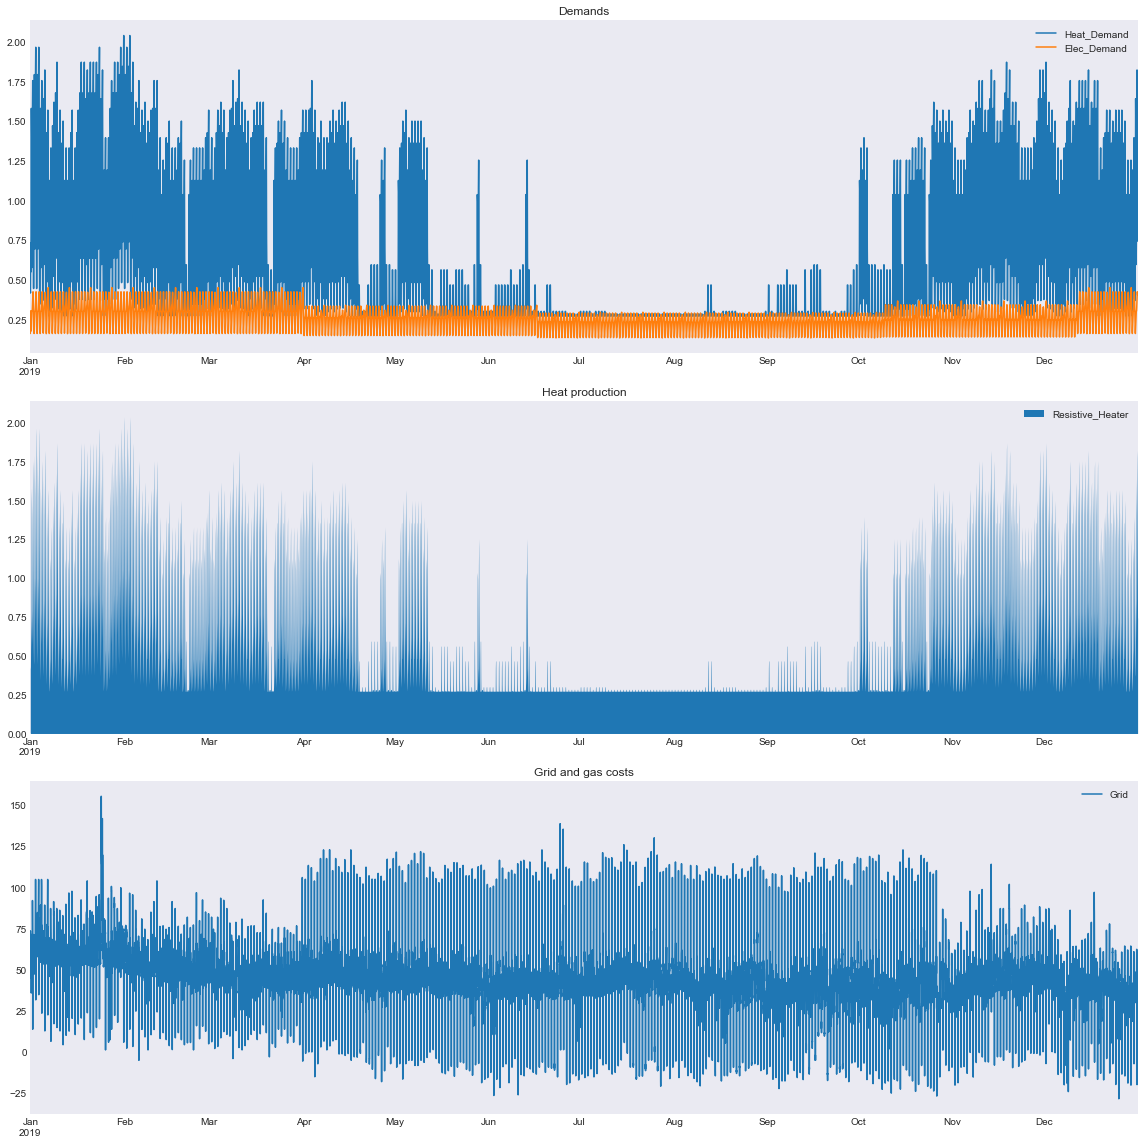

In [4]:
# ScotBord.network.generators_t.p['Heat_Pump'] = ScotBord.network.links_t.p1.Heat_Pump * -1
DE.network.generators_t.p['Resistive_Heater'] = DE.network.links_t.p1.Resistive_Heater * -1
# ScotBord.network.generators_t.marginal_cost['Gas_Boiler'] = ScotBord.network.generators.marginal_cost.Gas_Boiler

fig, axs = plt.subplots(3, 1, figsize=(16, 16))

DE.network.loads_t.p.rename_axis('').plot(ax=axs[0], title='Demands')
DE.network.generators_t.p.rename_axis('').drop(columns=['Grid']).plot.area(ax=axs[1], linewidth=0, title='Heat production')
DE.network.generators_t.marginal_cost.rename_axis('').plot(ax=axs[2], title='Grid and gas costs')
# DirectElectric.network.stores_t.e.rename_axis('').plot(ax=axs[3], title='Storages state of charge')

for ax in axs:
    ax.legend()
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Heat production'}>

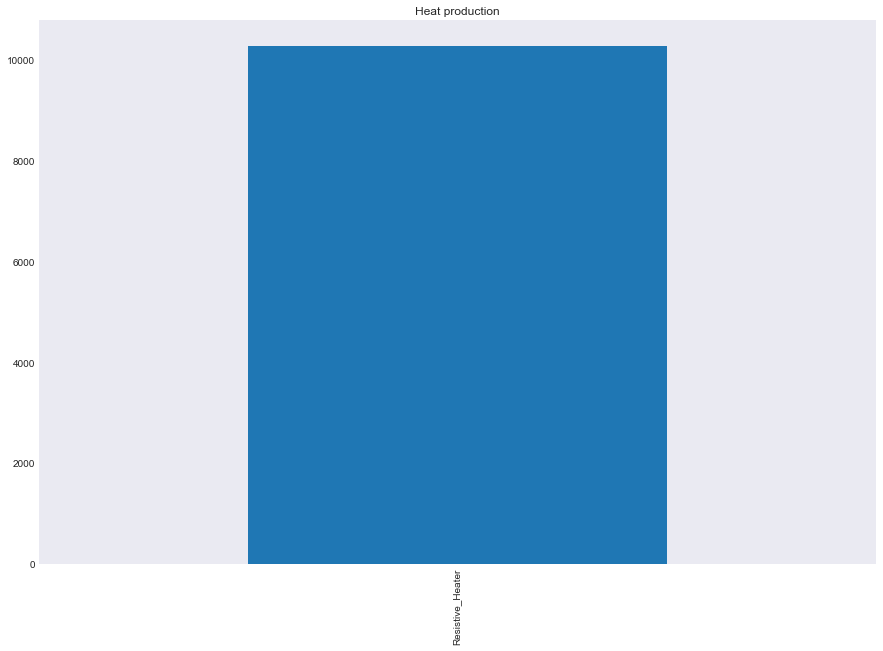

In [5]:
DE.network.generators_t.p.rename_axis('').drop(columns=['Grid']).sum().plot.bar(figsize=(15,10), title='Heat production')

Total carbon emissions kgCO2

In [6]:
DE.carbon_calculator(DE.network.generators_t.p.Grid)
DE.total_carbon_emissions = DE.carbon_emissions.sum().round(2)
DE.total_carbon_emissions

933927.3

Total costs £

In [7]:
DE.total_costs = DE.network.objective
DE.total_costs

695255.5010765404

In [8]:
DE.network.objective_constant


-0.0

## Scenario 2 - Direct electric and heat pump

In [9]:
timestep = '0.5H'
timestamp_from = '2019-01-01 00:00:00'
timestamp_to = '2019-12-31 23:30:00'
DE_HP = EnergyCentre(timestep=timestep, timestamp_from=timestamp_from, timestamp_to=timestamp_to)
DE_HP.get_data_scottish_borders()
DE_HP.add_bus('heat')
DE_HP.add_bus('elec')
DE_HP.add_heat_demand()
DE_HP.add_elec_demand()
DE_HP.add_grid_connection()
DE_HP.add_resistive_heater()
DE_HP.add_heat_pump()

# run LOPF
DE_HP.network.lopf(DE_HP.network.snapshots,
                    solver_name="gurobi",
                #   pyomo=False,
                #   keep_shadowprices=True,
                    )

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `kirchhoff` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x52561_copy
  Lower bound: 399177.3752971358
  Upper bound: 399177.3752971358
  Number of objectives: 1
  Number of constraints: 105121
  Number of variables: 52561
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 52561
  Number of nonzeros: 157681
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termination 

(<SolverStatus.ok: 'ok'>, <TerminationCondition.optimal: 'optimal'>)

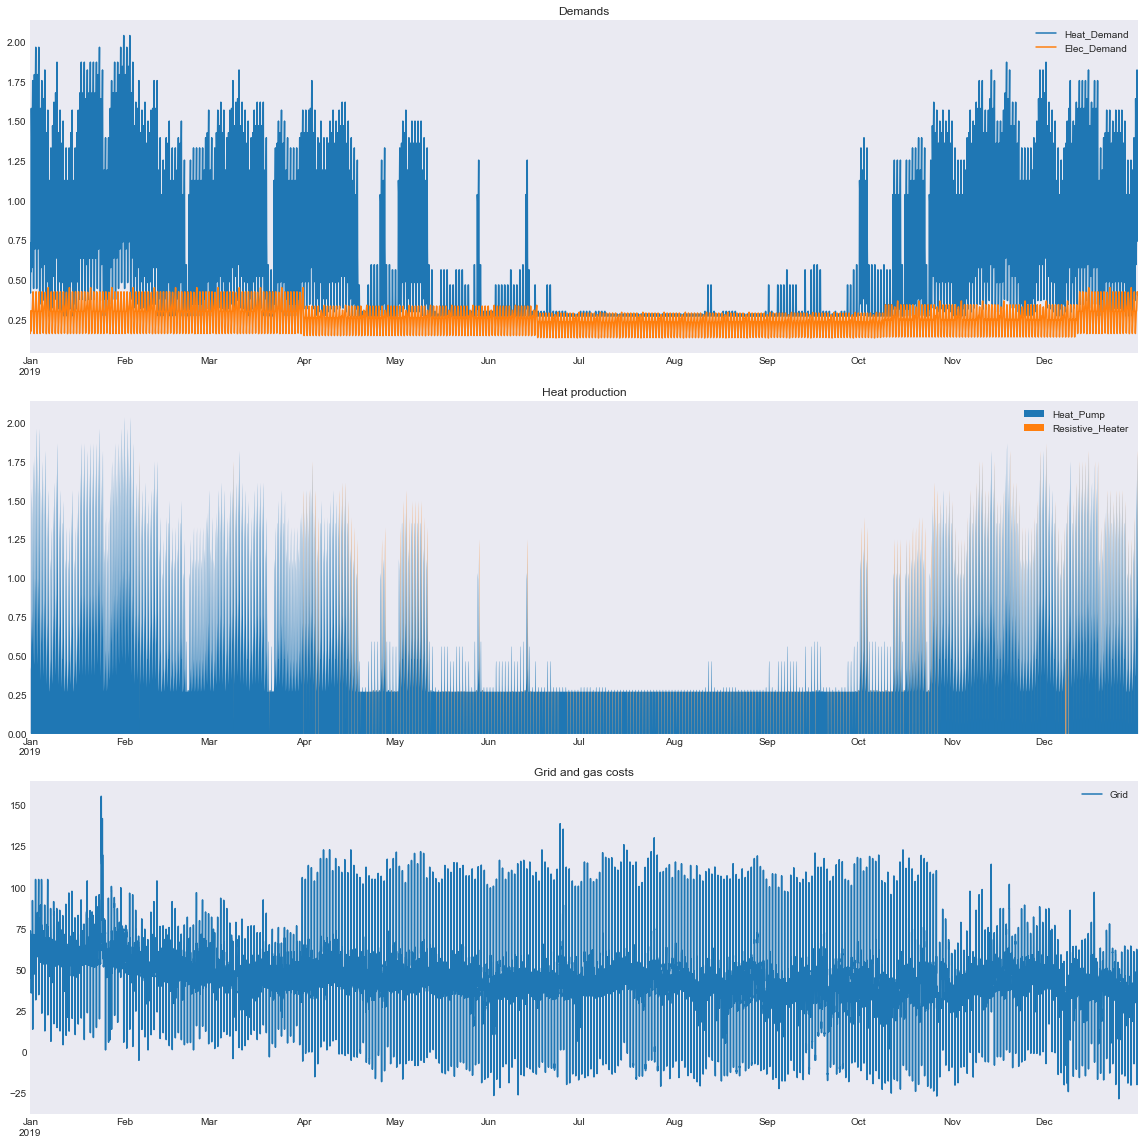

In [10]:
DE_HP.network.generators_t.p['Heat_Pump'] = DE_HP.network.links_t.p1.Heat_Pump * -1
DE_HP.network.generators_t.p['Resistive_Heater'] = DE_HP.network.links_t.p1.Resistive_Heater * -1
# ScotBord.network.generators_t.marginal_cost['Gas_Boiler'] = ScotBord.network.generators.marginal_cost.Gas_Boiler

fig, axs = plt.subplots(3, 1, figsize=(16, 16))

DE_HP.network.loads_t.p.rename_axis('').plot(ax=axs[0], title='Demands')
DE_HP.network.generators_t.p.rename_axis('').drop(columns=['Grid']).plot.area(ax=axs[1], linewidth=0, title='Heat production')
DE_HP.network.generators_t.marginal_cost.rename_axis('').plot(ax=axs[2], title='Grid and gas costs')
# DirectElectric.network.stores_t.e.rename_axis('').plot(ax=axs[3], title='Storages state of charge')

for ax in axs:
    ax.legend()
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Heat production'}>

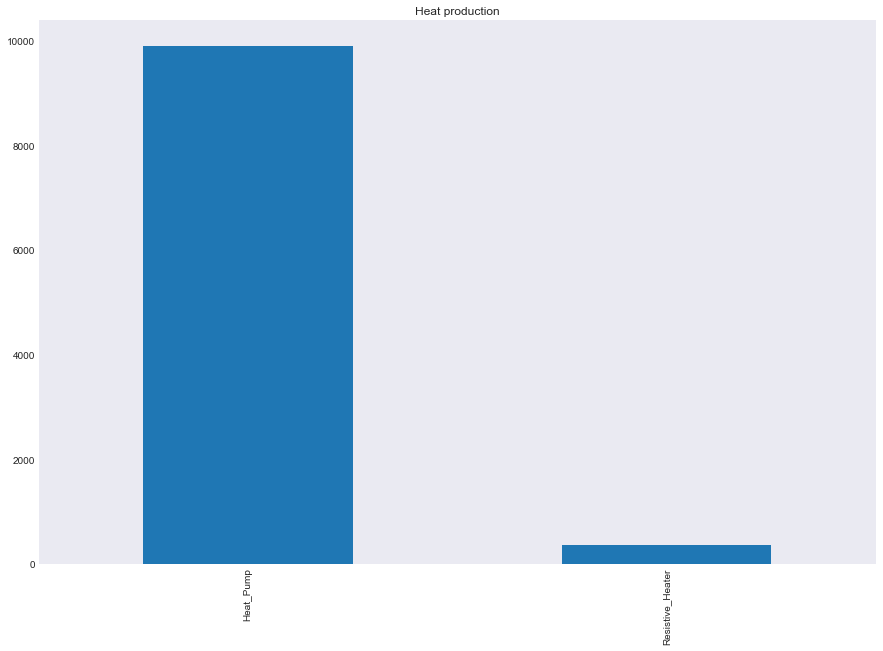

In [11]:
DE_HP.network.generators_t.p.rename_axis('').drop(columns=['Grid']).sum().plot.bar(figsize=(15,10), title='Heat production')

In [12]:
DE_HP.carbon_calculator(DE_HP.network.generators_t.p.Grid)
DE_HP.total_carbon_emissions = DE_HP.carbon_emissions.sum().round(2)
DE_HP.total_carbon_emissions

554347.6

In [13]:
DE_HP.total_costs = DE_HP.network.objective
DE_HP.total_costs

399177.3752971358

In [14]:
DE_HP.network.objective_constant

-0.0

## Scenario 3 - Direct electric, heat pump, and short-term thermal storage

In [15]:
timestep = '0.5H'
timestamp_from = '2019-01-01 00:00:00'
timestamp_to = '2019-12-31 23:30:00'
DE_HP_STS = EnergyCentre(timestep=timestep, timestamp_from=timestamp_from, timestamp_to=timestamp_to)
DE_HP_STS.get_data_scottish_borders()
DE_HP_STS.add_bus('heat')
DE_HP_STS.add_bus('elec')
DE_HP_STS.add_heat_demand()
DE_HP_STS.add_elec_demand()
DE_HP_STS.add_grid_connection()
DE_HP_STS.add_resistive_heater()
DE_HP_STS.add_heat_pump()
DE_HP_STS.add_short_term_store()

# run LOPF
DE_HP_STS.network.lopf(DE_HP_STS.network.snapshots,
                    solver_name="gurobi",
                #   pyomo=False,
                #   keep_shadowprices=True,
                    )

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `kirchhoff` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x122641_copy
  Lower bound: 304226.59026858624
  Upper bound: 304226.59026858624
  Number of objectives: 1
  Number of constraints: 210241
  Number of variables: 122641
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 122641
  Number of nonzeros: 367920
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termina

(<SolverStatus.ok: 'ok'>, <TerminationCondition.optimal: 'optimal'>)

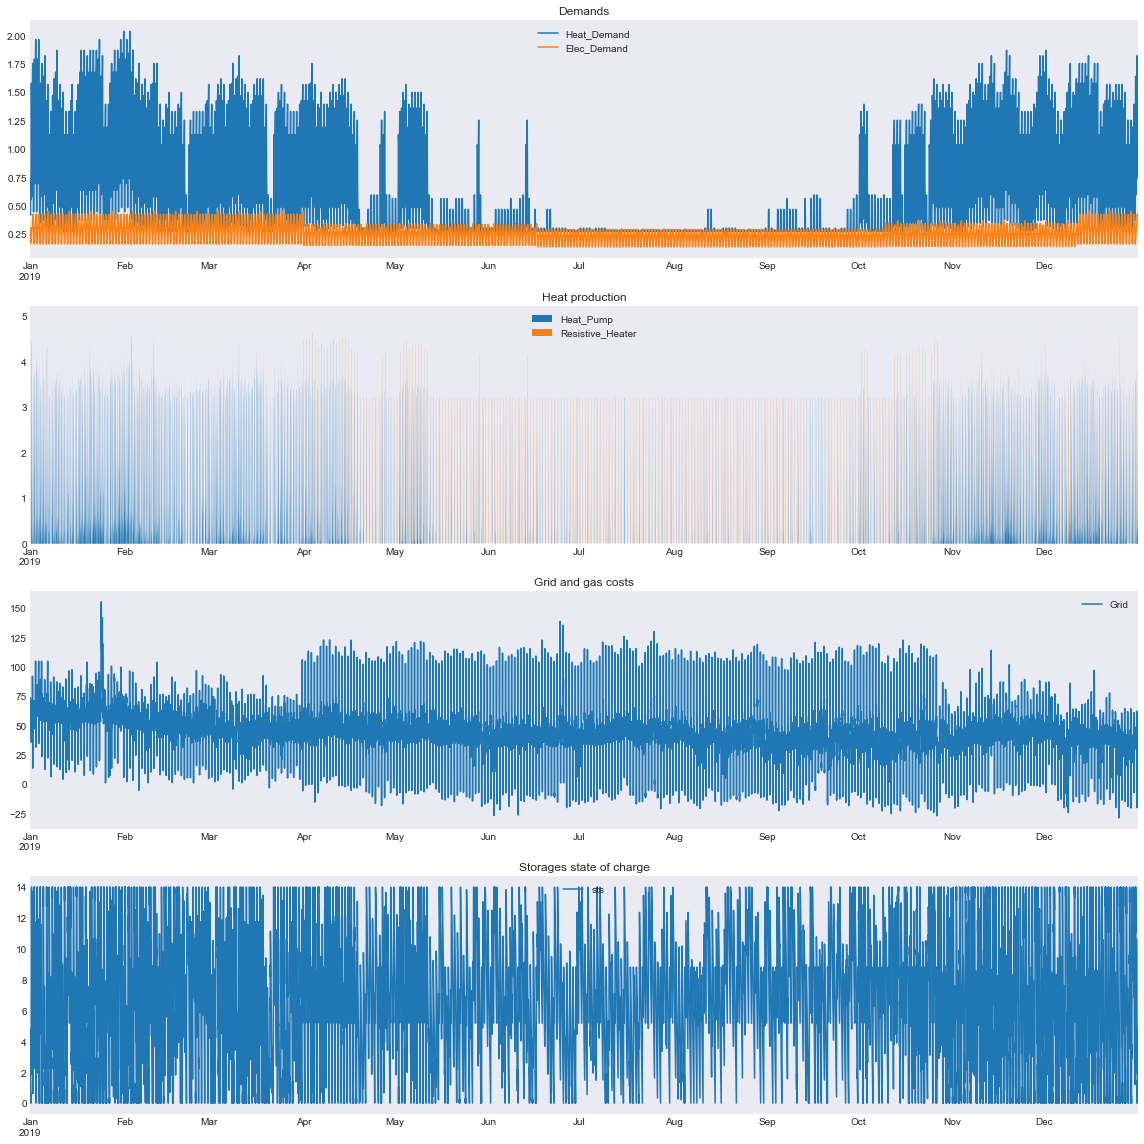

In [16]:
DE_HP_STS.network.generators_t.p['Heat_Pump'] = DE_HP_STS.network.links_t.p1.Heat_Pump * -1
DE_HP_STS.network.generators_t.p['Resistive_Heater'] = DE_HP_STS.network.links_t.p1.Resistive_Heater * -1
# ScotBord.network.generators_t.marginal_cost['Gas_Boiler'] = ScotBord.network.generators.marginal_cost.Gas_Boiler

fig, axs = plt.subplots(4, 1, figsize=(16, 16))

DE_HP_STS.network.loads_t.p.rename_axis('').plot(ax=axs[0], title='Demands')
DE_HP_STS.network.generators_t.p.rename_axis('').drop(columns=['Grid']).plot.area(ax=axs[1], linewidth=0, title='Heat production')
DE_HP_STS.network.generators_t.marginal_cost.rename_axis('').plot(ax=axs[2], title='Grid and gas costs')
DE_HP_STS.network.stores_t.e.rename_axis('').plot(ax=axs[3], title='Storages state of charge')

for ax in axs:
    ax.legend()
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Heat production'}>

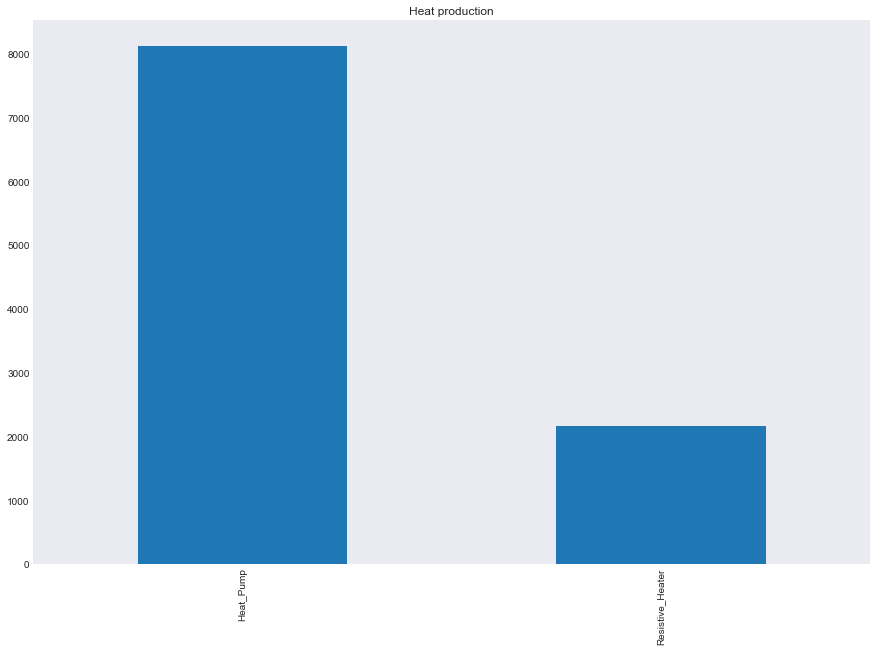

In [17]:
DE_HP_STS.network.generators_t.p.rename_axis('').drop(columns=['Grid']).sum().plot.bar(figsize=(15,10), title='Heat production')

In [18]:
DE_HP_STS.carbon_calculator(DE_HP_STS.network.generators_t.p.Grid)
DE_HP_STS.total_carbon_emissions = DE_HP_STS.carbon_emissions.sum().round(2)
DE_HP_STS.total_carbon_emissions

603050.05

In [19]:
DE_HP_STS.total_costs = DE_HP_STS.network.objective
DE_HP_STS.total_costs

304226.59026858624

In [20]:
DE_HP_STS.network.objective_constant

-0.0

## Scenario 4 - Direct electric, heat pump, short-term thermal storage, and long-term thermal storage

In [21]:
timestep = '0.5H'
timestamp_from = '2019-01-01 00:00:00'
timestamp_to = '2019-12-31 23:30:00'
DE_HP_STS_LTS = EnergyCentre(timestep=timestep, timestamp_from=timestamp_from, timestamp_to=timestamp_to)
DE_HP_STS_LTS.get_data_scottish_borders()
DE_HP_STS_LTS.add_bus('heat')
DE_HP_STS_LTS.add_bus('elec')
DE_HP_STS_LTS.add_heat_demand()
DE_HP_STS_LTS.add_elec_demand()
DE_HP_STS_LTS.add_grid_connection()
DE_HP_STS_LTS.add_resistive_heater()
DE_HP_STS_LTS.add_heat_pump()
DE_HP_STS_LTS.add_short_term_store()
DE_HP_STS_LTS.add_long_term_store()

# run LOPF
DE_HP_STS_LTS.network.lopf(DE_HP_STS_LTS.network.snapshots,
                    solver_name="gurobi",
                #   pyomo=False,
                #   keep_shadowprices=True,
                    )

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `kirchhoff` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x192721_copy
  Lower bound: 295282.0495655128
  Upper bound: 295282.0495655128
  Number of objectives: 1
  Number of constraints: 315361
  Number of variables: 192721
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 192721
  Number of nonzeros: 578159
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Terminati

(<SolverStatus.ok: 'ok'>, <TerminationCondition.optimal: 'optimal'>)

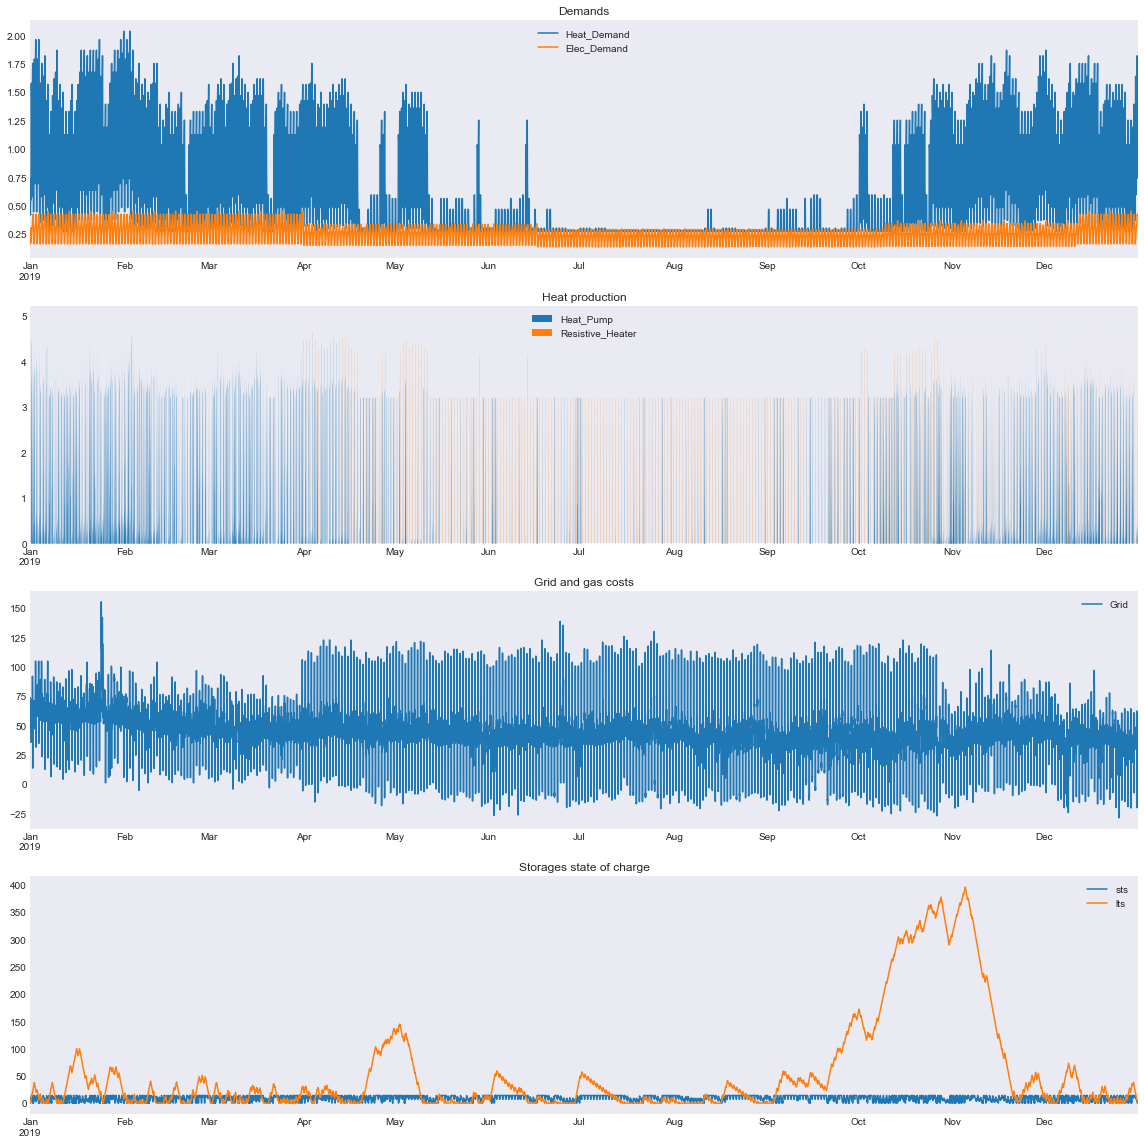

In [22]:
DE_HP_STS_LTS.network.generators_t.p['Heat_Pump'] = DE_HP_STS_LTS.network.links_t.p1.Heat_Pump * -1
DE_HP_STS_LTS.network.generators_t.p['Resistive_Heater'] = DE_HP_STS_LTS.network.links_t.p1.Resistive_Heater * -1
# ScotBord.network.generators_t.marginal_cost['Gas_Boiler'] = ScotBord.network.generators.marginal_cost.Gas_Boiler

fig, axs = plt.subplots(4, 1, figsize=(16, 16))

DE_HP_STS_LTS.network.loads_t.p.rename_axis('').plot(ax=axs[0], title='Demands')
DE_HP_STS_LTS.network.generators_t.p.rename_axis('').drop(columns=['Grid']).plot.area(ax=axs[1], linewidth=0, title='Heat production')
DE_HP_STS_LTS.network.generators_t.marginal_cost.rename_axis('').plot(ax=axs[2], title='Grid and gas costs')
DE_HP_STS_LTS.network.stores_t.e.rename_axis('').plot(ax=axs[3], title='Storages state of charge')

for ax in axs:
    ax.legend()
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Heat production'}>

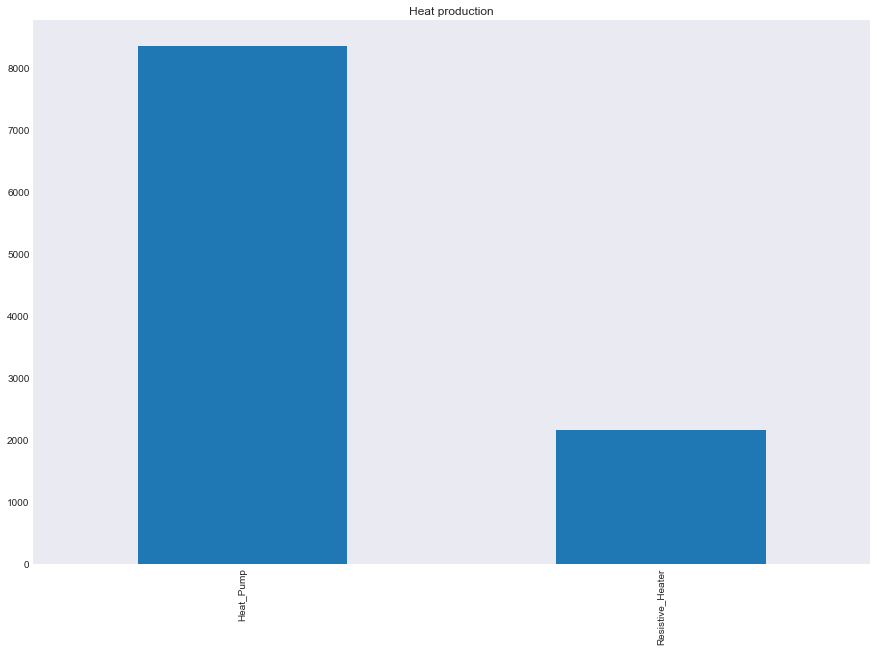

In [23]:
DE_HP_STS_LTS.network.generators_t.p.rename_axis('').drop(columns=['Grid']).sum().plot.bar(figsize=(15,10), title='Heat production')

In [24]:
DE_HP_STS_LTS.carbon_calculator(DE_HP_STS_LTS.network.generators_t.p.Grid)
DE_HP_STS_LTS.total_carbon_emissions = DE_HP_STS_LTS.carbon_emissions.sum().round(2)
DE_HP_STS_LTS.total_carbon_emissions

587916.45

In [25]:
DE_HP_STS_LTS.total_costs = DE_HP_STS_LTS.network.objective
DE_HP_STS_LTS.total_costs

295282.0495655128

In [26]:
DE_HP_STS_LTS.network.objective_constant

-0.0

## Scenario 5 - Curtailed wind discount

In [27]:
timestep = '0.5H'
timestamp_from = '2019-01-01 00:00:00'
timestamp_to = '2019-12-31 23:30:00'
CurtailedWind = EnergyCentre(timestep=timestep, timestamp_from=timestamp_from, timestamp_to=timestamp_to)
CurtailedWind.get_data_scottish_borders()

CurtailedWind.apply_constraint_discount()

CurtailedWind.add_bus('heat')
CurtailedWind.add_bus('elec')
CurtailedWind.add_heat_demand()
CurtailedWind.add_elec_demand()
CurtailedWind.add_grid_connection()
CurtailedWind.add_resistive_heater()
CurtailedWind.add_heat_pump()
CurtailedWind.add_short_term_store()
CurtailedWind.add_long_term_store()

# run LOPF
CurtailedWind.network.lopf(CurtailedWind.network.snapshots,
                    solver_name="gurobi",
                #   pyomo=False,
                #   keep_shadowprices=True,
                    )

INFO:pypsa.opf:Performed preliminary steps
INFO:pypsa.opf:Building pyomo model using `kirchhoff` formulation
INFO:pypsa.opf:Solving model using gurobi
INFO:pypsa.opf:Optimization successful


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: x192721_copy
  Lower bound: 242965.72983916447
  Upper bound: 242965.72983916447
  Number of objectives: 1
  Number of constraints: 315361
  Number of variables: 192721
  Number of binary variables: 0
  Number of integer variables: 0
  Number of continuous variables: 192721
  Number of nonzeros: 578159
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Return code: 0
  Message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Termination condition: optimal
  Termina

(<SolverStatus.ok: 'ok'>, <TerminationCondition.optimal: 'optimal'>)

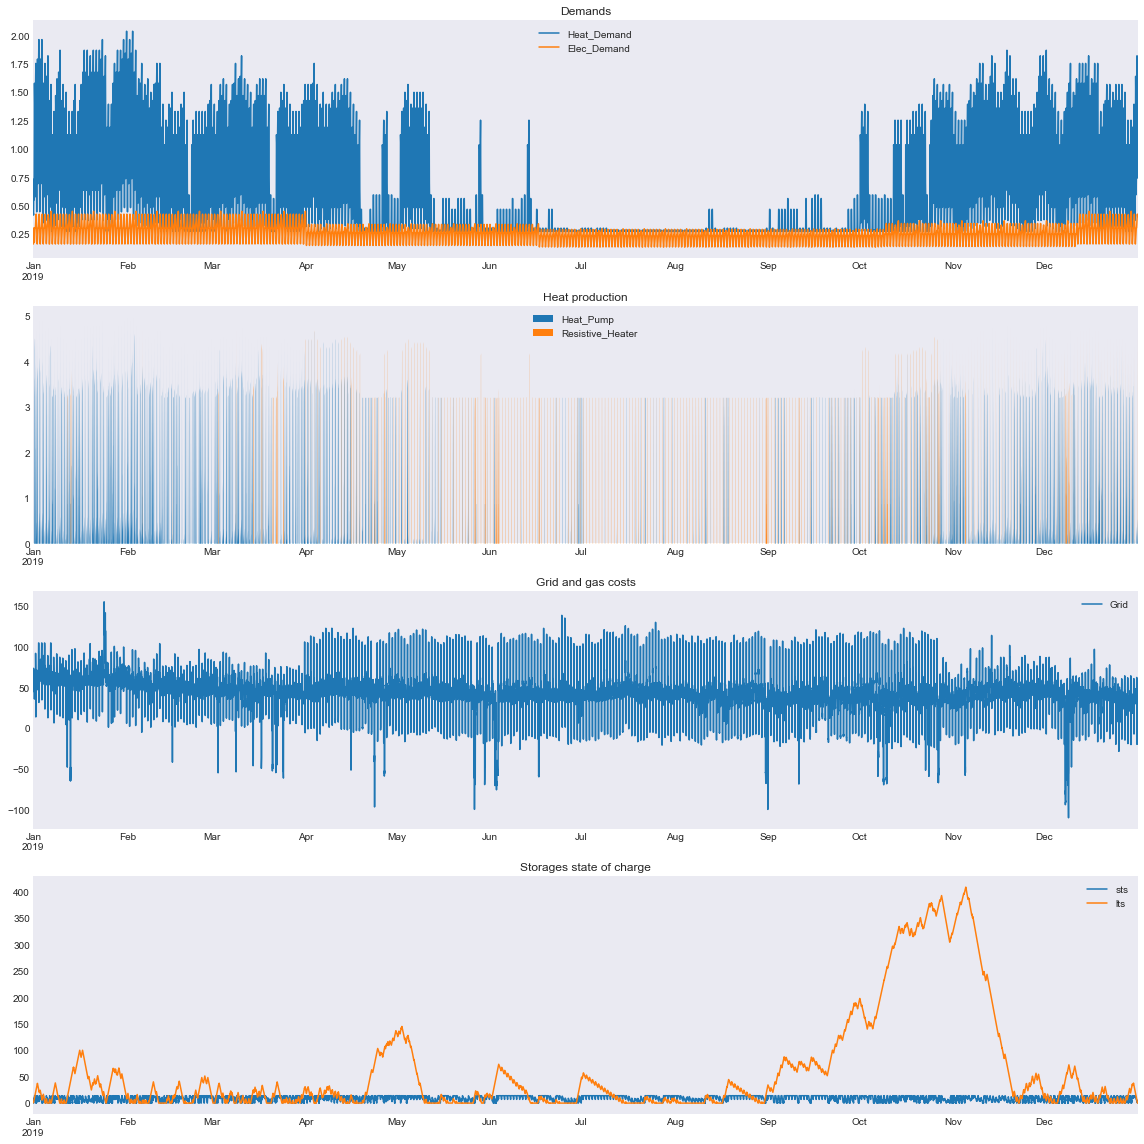

In [28]:
CurtailedWind.network.generators_t.p['Heat_Pump'] = CurtailedWind.network.links_t.p1.Heat_Pump * -1
CurtailedWind.network.generators_t.p['Resistive_Heater'] = CurtailedWind.network.links_t.p1.Resistive_Heater * -1
# ScotBord.network.generators_t.marginal_cost['Gas_Boiler'] = ScotBord.network.generators.marginal_cost.Gas_Boiler

fig, axs = plt.subplots(4, 1, figsize=(16, 16))

CurtailedWind.network.loads_t.p.rename_axis('').plot(ax=axs[0], title='Demands')
CurtailedWind.network.generators_t.p.rename_axis('').drop(columns=['Grid']).plot.area(ax=axs[1], linewidth=0, title='Heat production')
CurtailedWind.network.generators_t.marginal_cost.rename_axis('').plot(ax=axs[2], title='Grid and gas costs')
CurtailedWind.network.stores_t.e.rename_axis('').plot(ax=axs[3], title='Storages state of charge')

for ax in axs:
    ax.legend()
plt.tight_layout()
plt.show()

<AxesSubplot:title={'center':'Heat production'}>

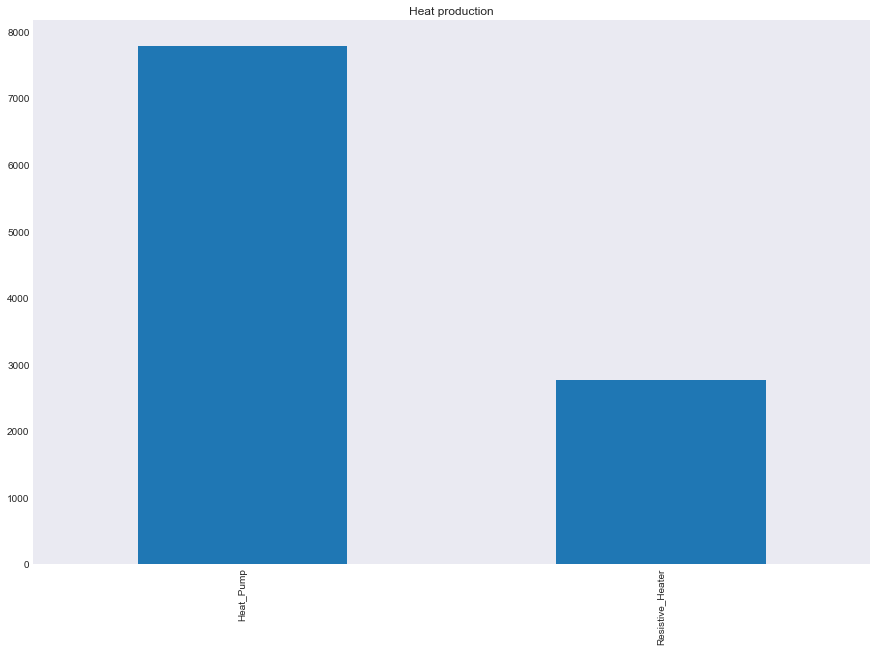

In [29]:
CurtailedWind.network.generators_t.p.rename_axis('').drop(columns=['Grid']).sum().plot.bar(figsize=(15,10), title='Heat production')

In [30]:
CurtailedWind.carbon_calculator(CurtailedWind.network.generators_t.p.Grid)
CurtailedWind.total_carbon_emissions = CurtailedWind.carbon_emissions.sum().round(2)
CurtailedWind.total_carbon_emissions

602412.79

In [31]:
CurtailedWind.total_costs = CurtailedWind.network.objective
CurtailedWind.total_costs

242965.72983916447

In [32]:
CurtailedWind.network.objective_constant

-0.0

## Compare scenarios

<AxesSubplot:>

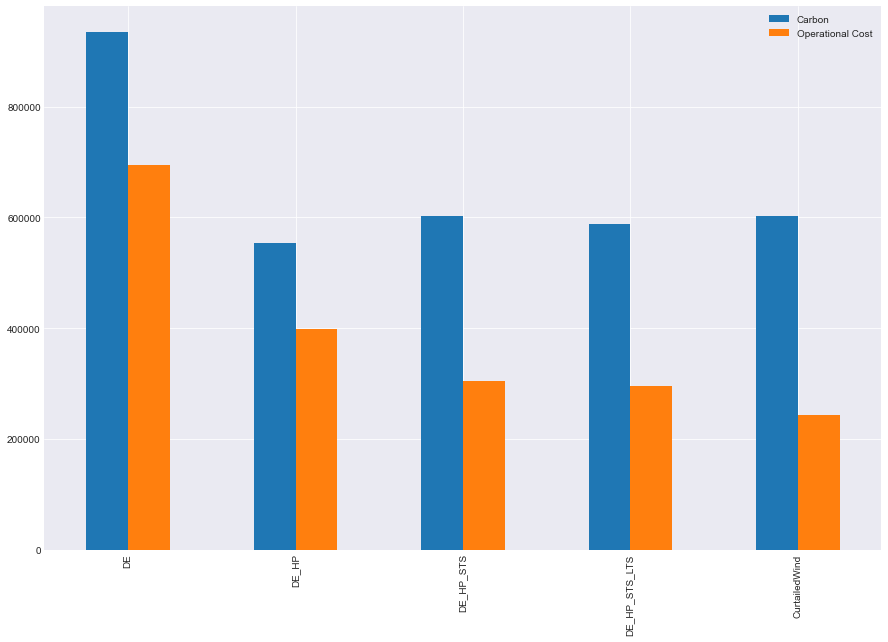

In [33]:
carbon_emissions = [DE.total_carbon_emissions, DE_HP.total_carbon_emissions,
                    DE_HP_STS.total_carbon_emissions, DE_HP_STS_LTS.total_carbon_emissions,
                    CurtailedWind.total_carbon_emissions]

costs = [DE.total_costs, DE_HP.total_costs,
         DE_HP_STS.total_costs, DE_HP_STS_LTS.total_costs,
         CurtailedWind.total_costs]

df_compare = pd.DataFrame(data=[carbon_emissions, costs]).T#
df_compare.columns = ['Carbon', 'Operational Cost']
df_compare.index = ['DE', 'DE_HP', 'DE_HP_STS', 'DE_HP_STS_LTS', 'CurtailedWind']
df_compare.plot.bar(figsize=(15,10), grid=True)